# Exploratory Data Analysis - EMNIST ByClass

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import collections

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)

In [7]:
train = pd.read_csv('data/emnist-byclass-train.csv', header=None, dtype=np.uint8).values
test = pd.read_csv('data/emnist-byclass-test.csv', header=None, dtype=np.uint8).values

X_train = train[:, 1:].astype(np.uint8, copy=False)
X_test = test[:, 1:].astype(np.uint8, copy=False)
y_train = train[:, 0].flatten().astype(np.uint8, copy=False)
y_test = test[:, 0].flatten().astype(np.uint8, copy=False)

# Reshape from (N, 784) to (N, 28, 28)
X_train = X_train.reshape(-1, 28, 28).astype(np.uint8, copy=False)
X_test = X_test.reshape(-1, 28, 28).astype(np.uint8, copy=False)

# Rotate images to correct orientation
X_train = np.fliplr(np.rot90(X_train, k=3, axes=(1, 2))).astype(np.uint8, copy=False)
X_test = np.fliplr(np.rot90(X_test, k=3, axes=(1, 2))).astype(np.uint8, copy=False)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Pixel value range: {X_train.min()} to {X_train.max()}")
print(f"Label value range: {y_train.min()} to {y_train.max()}")

Training set shape: (697932, 28, 28)
Test set shape: (116323, 28, 28)
Training labels shape: (697932,)
Test labels shape: (116323,)
Pixel value range: 0 to 255
Label value range: 0 to 61


In [8]:
class_mapping = {}
idx = 0

# Digits 0-9
for i in range(10):
    class_mapping[idx] = str(i)
    idx += 1

# Uppercase letters A-Z
for i in range(26):
    class_mapping[idx] = chr(i + ord('A'))
    idx += 1

# Lowercase letters a-z
for i in range(26):
    class_mapping[idx] = chr(i + ord('a'))
    idx += 1

print(f"Total classes: {len(class_mapping)}")
print(f"Class mapping: {class_mapping}")

Total classes: 62
Class mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z'}


In [9]:
train_counts = collections.Counter(y_train)
test_counts = collections.Counter(y_test)

train_df = pd.DataFrame(list(train_counts.items()), columns=['class_id', 'count'])
train_df['class_name'] = train_df['class_id'].map(class_mapping)

test_df = pd.DataFrame(list(test_counts.items()), columns=['class_id', 'count'])
test_df['class_name'] = test_df['class_id'].map(class_mapping)

print("Training set class distribution:")
for class_id in sorted(train_counts.keys()):
    class_name = class_mapping.get(class_id, f"Unknown ({class_id})")
    print(f"    {class_name}: {train_counts[class_id]:,}")

for class_id in sorted(test_counts.keys()):
    class_name = class_mapping.get(class_id, f"Unknown ({class_id})")
    print(f"    {class_name}: {test_counts[class_id]:,}")

Training set class distribution:
    0: 34,585
    1: 38,374
    2: 34,203
    3: 35,143
    4: 33,535
    5: 31,416
    6: 34,232
    7: 35,754
    8: 33,946
    9: 33,847
    A: 6,407
    B: 3,878
    C: 10,094
    D: 4,562
    E: 4,934
    F: 9,182
    G: 2,517
    H: 3,152
    I: 11,946
    J: 3,762
    K: 2,468
    L: 5,076
    M: 9,002
    N: 8,237
    O: 24,983
    P: 8,347
    Q: 2,605
    R: 5,073
    S: 20,764
    T: 9,820
    U: 12,602
    V: 4,637
    W: 4,695
    X: 2,771
    Y: 4,743
    Z: 2,701
    a: 10,033
    b: 5,159
    c: 2,854
    d: 10,177
    e: 24,631
    f: 2,561
    g: 3,687
    h: 8,738
    i: 2,725
    j: 1,896
    k: 2,491
    l: 15,318
    m: 2,645
    n: 11,418
    o: 2,749
    p: 2,448
    q: 2,994
    r: 14,105
    s: 2,699
    t: 18,262
    u: 2,830
    v: 2,910
    w: 2,697
    x: 2,822
    y: 2,365
    z: 2,725
    0: 5,778
    1: 6,330
    2: 5,869
    3: 5,969
    4: 5,619
    5: 5,190
    6: 5,705
    7: 6,139
    8: 5,633
    9: 5,686
    A: 1,

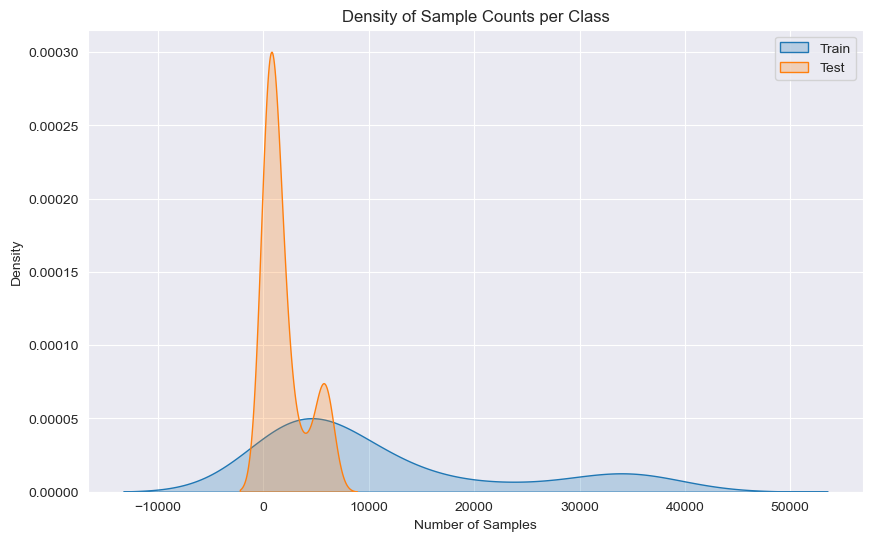

In [10]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train_df['count'], label='Train', fill=True)
sns.kdeplot(test_df['count'], label='Test', fill=True)
plt.title('Density of Sample Counts per Class')
plt.xlabel('Number of Samples')
plt.ylabel('Density')
plt.legend()
plt.show()

In [11]:
print(f"Training samples: {X_train.shape[0]:,}")
print(f"Test samples: {X_test.shape[0]:,}")
print(f"Total samples: {X_train.shape[0] + X_test.shape[0]:,}")
print(f"Image dimensions: {X_train.shape[1]} x {X_train.shape[2]} pixels")
print(f"Number of classes: {len(np.unique(y_train))}")

Training samples: 697,932
Test samples: 116,323
Total samples: 814,255
Image dimensions: 28 x 28 pixels
Number of classes: 62
